# Лабораторная работа 1: Линейная регрессия

Цель: предсказать RiskScore для тестового набора данных используя линейную регрессию

## Импорт библиотек

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression as SklearnLR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## 1. Загрузка данных

In [240]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(f"\nПервые строки train:")
train_df.head()

Train shape: (11017, 35)
Test shape: (5000, 35)

Первые строки train:


,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,31.347091


In [241]:
print("Информация о данных:")
train_df.info()

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToInco

In [242]:
print("Статистика числовых признаков:")
train_df.describe()

Статистика числовых признаков:


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
count,10487.000000,10487.000000,9986.000000,9986.000000,10487.000000,10487.000000,9986.000000,10487.000000,10487.000000,10487.000000,...,10487.000000,10487.000000,10487.000000,10487.000000,9.986000e+03,9986.000000,10487.000000,10487.000000,10487.000000,1.048700e+04
mean,39.850386,131587.872127,678.082716,29874.218306,53.439878,1.568323,546.458642,0.284397,3.033565,0.979498,...,10838.934141,0.784428,4.949271,17.628302,1.542381e+05,0.200392,0.200112,1075.622426,0.517577,-2.569878e+04
std,11.614132,115791.941909,175.192486,27705.509722,24.493562,1.418684,501.981888,0.159240,1.740186,0.990927,...,9385.924858,0.123039,2.201100,11.337248,4.622229e+05,0.094388,0.096458,1344.053181,0.894637,1.431675e+06
min,18.000000,15000.000000,300.000000,1063.000000,12.000000,0.000000,13.000000,0.003674,0.000000,0.000000,...,1250.000000,0.259301,0.000000,0.000000,1.004000e+03,0.052494,0.046445,30.008506,0.006064,-9.999999e+06
25%,32.000000,20959.500000,550.000000,12658.000000,36.000000,0.000000,233.250000,0.158929,2.000000,0.000000,...,1683.541667,0.708475,3.000000,9.000000,7.252500e+03,0.119908,0.119548,375.872620,0.066734,3.256475e+01
50%,40.000000,89015.000000,722.500000,21828.500000,48.000000,1.000000,398.000000,0.262229,3.000000,1.000000,...,7371.250000,0.803692,5.000000,17.000000,2.742950e+04,0.182023,0.180710,684.878529,0.178193,4.411876e+01
75%,48.000000,257025.000000,850.000000,37158.000000,60.000000,3.000000,685.000000,0.391683,4.000000,2.000000,...,21232.583333,0.879312,6.000000,26.000000,1.241758e+05,0.264709,0.264880,1279.930203,0.637457,6.535690e+01
max,80.000000,748508.000000,850.000000,418997.000000,120.000000,6.000000,10879.000000,0.914635,12.000000,6.000000,...,25000.000000,0.996573,17.000000,57.000000,1.126117e+07,0.722497,0.833647,29634.807816,24.383046,1.000000e+07


In [243]:
print(f"Пропуски в train:\n{train_df.isnull().sum()[train_df.isnull().sum() > 0]}")
print(f"\nПропуски в test:\n{test_df.isnull().sum()[test_df.isnull().sum() > 0]}")

Пропуски в train:
ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Ex

## 2. Разведочный анализ данных (EDA)

### Распределение целевой переменной RiskScore

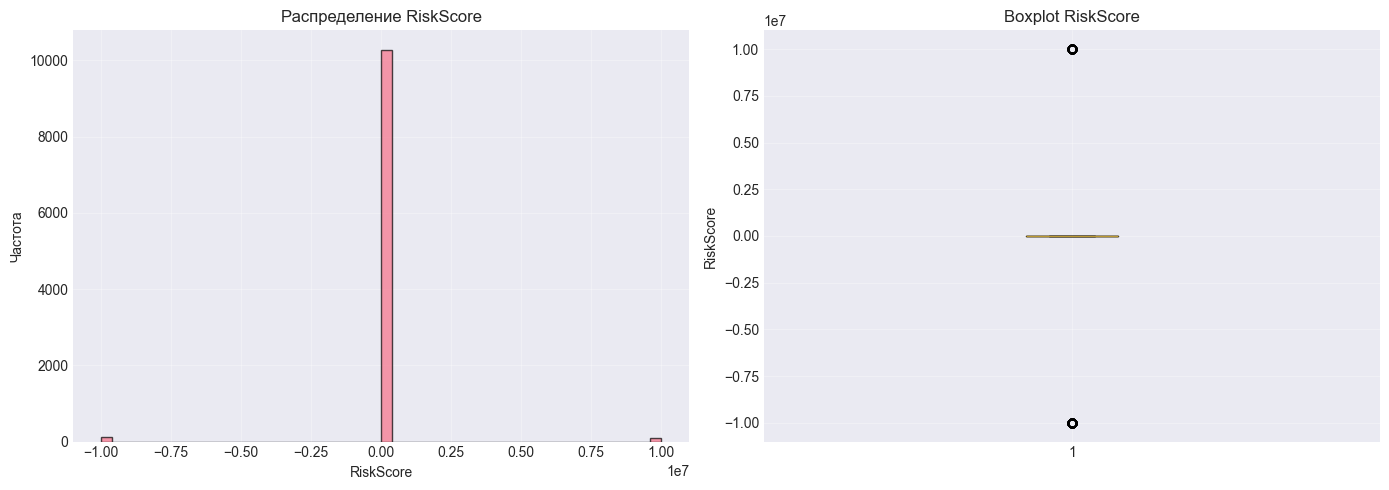

Среднее RiskScore: -25698.78
Медиана RiskScore: 44.12
Стандартное отклонение: 1431674.59


In [244]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(train_df['RiskScore'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.title('Распределение RiskScore')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(train_df['RiskScore'].dropna())
plt.ylabel('RiskScore')
plt.title('Boxplot RiskScore')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Среднее RiskScore: {train_df['RiskScore'].mean():.2f}")
print(f"Медиана RiskScore: {train_df['RiskScore'].median():.2f}")
print(f"Стандартное отклонение: {train_df['RiskScore'].std():.2f}")

### Анализ зависимостей признаков

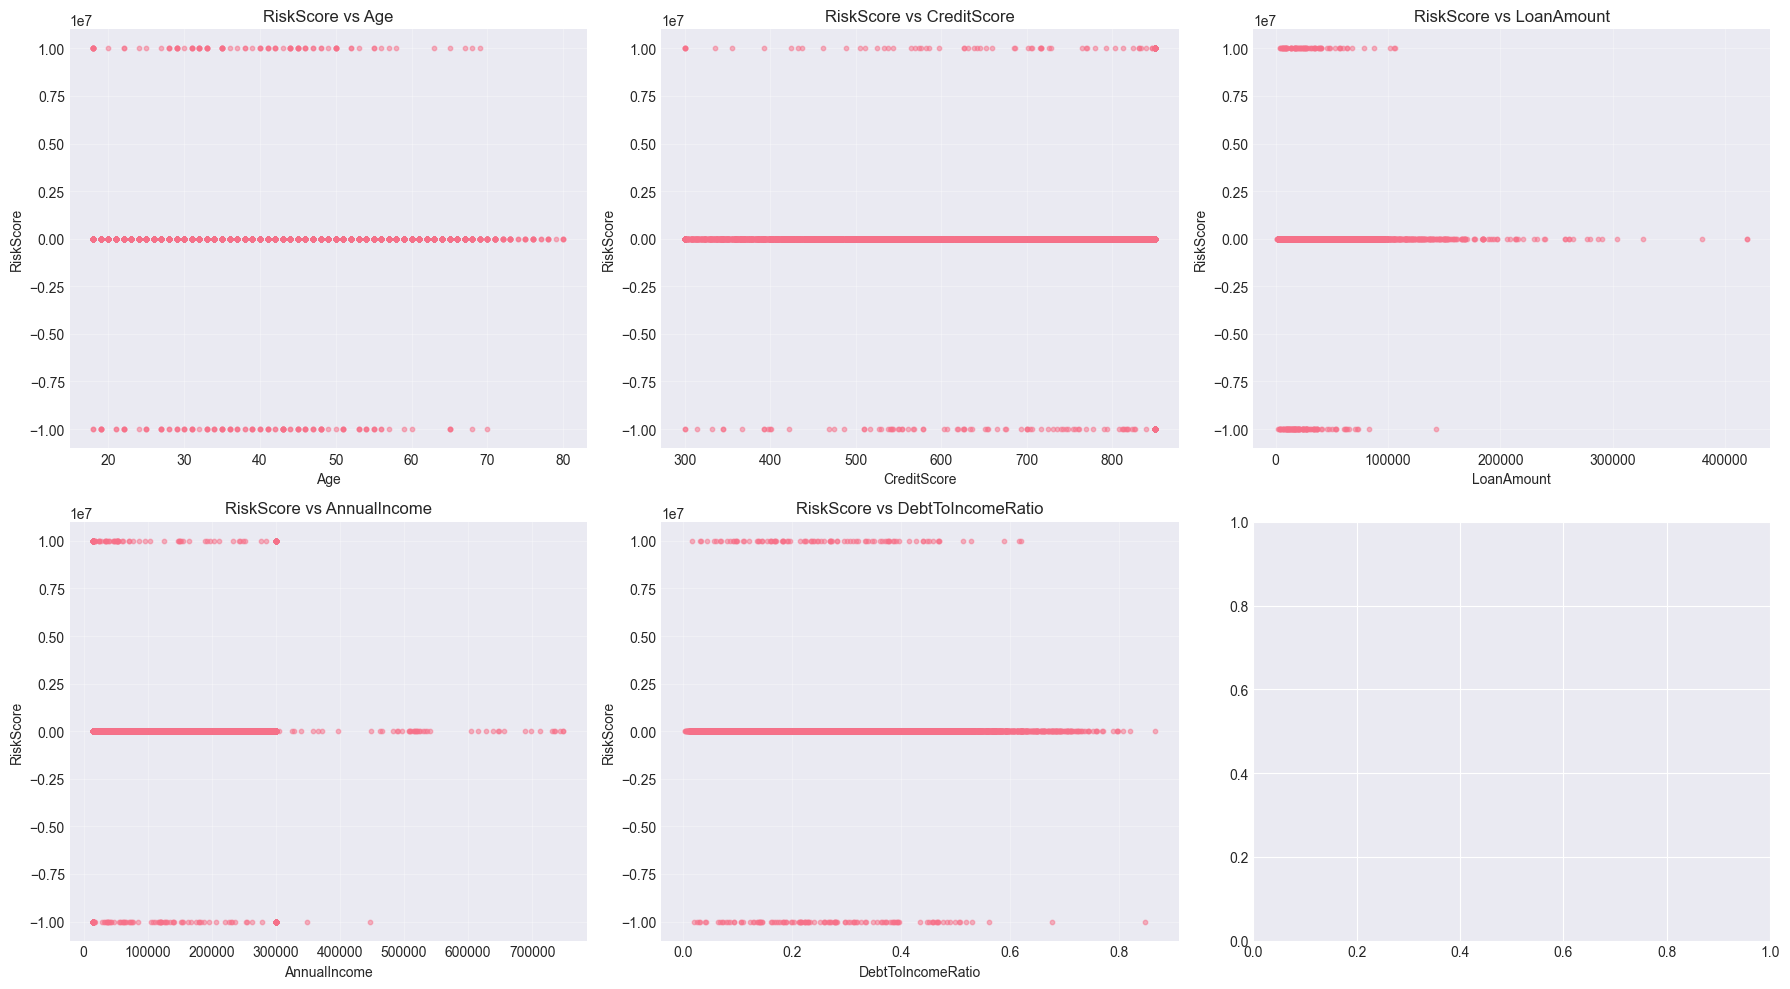

In [245]:
key_features = ['Age', 'CreditScore', 'LoanAmount', 'AnnualIncome', 'DebtToIncomeRatio', 'RiskScore']
valid_features = [f for f in key_features if f in train_df.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(valid_features[:-1]):
    data_clean = train_df[[feature, 'RiskScore']].dropna()
    axes[idx].scatter(data_clean[feature], data_clean['RiskScore'], alpha=0.5, s=10)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('RiskScore')
    axes[idx].set_title(f'RiskScore vs {feature}')
    axes[idx].grid(True, alpha=0.3)

if len(valid_features) < 6:
    for idx in range(len(valid_features)-1, 6):
        fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Матрица корреляций для числовых признаков

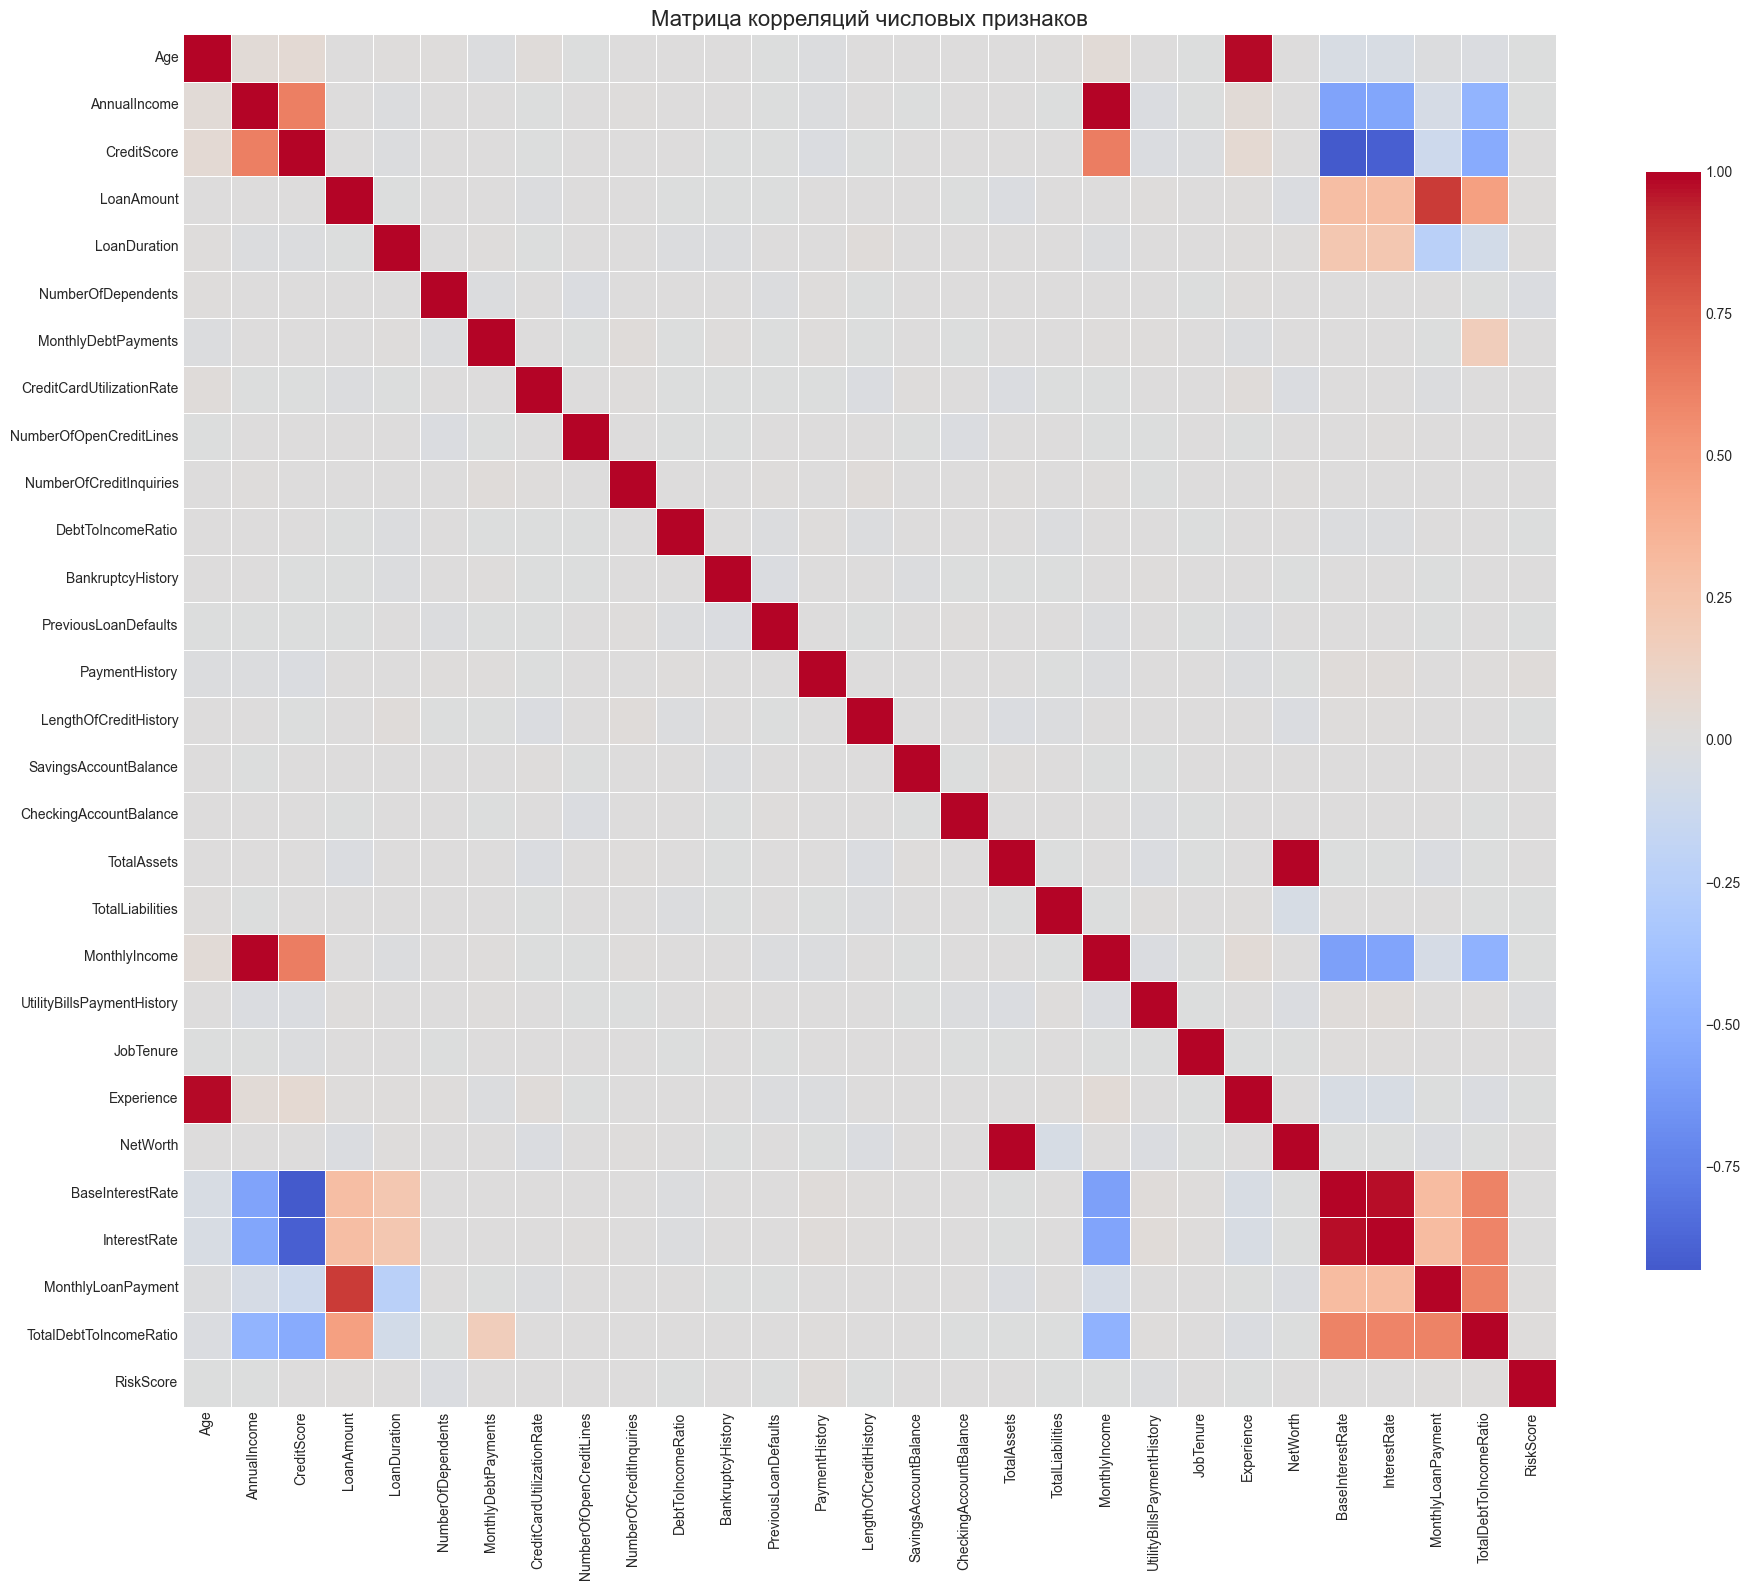

In [246]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = train_df[numeric_cols].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()

In [247]:
risk_corr = correlation_matrix['RiskScore'].sort_values(ascending=False)
print("Топ-15 признаков по корреляции с RiskScore:")
print(risk_corr.head(15))

Топ-15 признаков по корреляции с RiskScore:
RiskScore                    1.000000
PaymentHistory               0.019144
TotalDebtToIncomeRatio       0.013879
MonthlyLoanPayment           0.012366
LoanAmount                   0.011771
NumberOfCreditInquiries      0.011055
NetWorth                     0.008804
TotalAssets                  0.008092
SavingsAccountBalance        0.007611
CreditCardUtilizationRate    0.005501
BankruptcyHistory            0.005184
JobTenure                    0.003822
InterestRate                 0.003388
CreditScore                  0.002383
BaseInterestRate             0.002081
Name: RiskScore, dtype: float64


**Выводы EDA:**
- RiskScore имеет большой разброс значений с выбросами
- Наблюдается сильная корреляция между некоторыми признаками (например, AnnualIncome и MonthlyIncome)
- Присутствуют пропущенные значения в некоторых признаках
- Аномальное значение -9999999 в RiskScore требует обработки

## 3. Предобработка данных

In [248]:
def preprocess_data(df, is_train=True):
    df = df.copy()
    
    if is_train and 'RiskScore' in df.columns:
        df = df[df['RiskScore'] > -1000000]
    
    if 'ApplicationDate' in df.columns:
        df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])
        df['Year'] = df['ApplicationDate'].dt.year
        df['Month'] = df['ApplicationDate'].dt.month
        df['DayOfWeek'] = df['ApplicationDate'].dt.dayofweek
        df['DayOfYear'] = df['ApplicationDate'].dt.dayofyear
        df = df.drop('ApplicationDate', axis=1)
    
    if 'UtilityBillsPaymentHistory' in df.columns:
        def parse_utility(val):
            if pd.isna(val):
                return np.nan
            if isinstance(val, (int, float)):
                return val
            try:
                if isinstance(val, str) and '[' in val:
                    nums = eval(val)
                    return np.mean(nums) if nums else np.nan
                return float(val)
            except:
                return np.nan
        
        df['UtilityBillsPaymentHistory'] = df['UtilityBillsPaymentHistory'].apply(parse_utility)
    
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_cols:
        df[col] = df[col].astype('category').cat.codes
    
    return df

train_processed = preprocess_data(train_df, is_train=True)
test_processed = preprocess_data(test_df, is_train=False)

print(f"Train shape после предобработки: {train_processed.shape}")
print(f"Test shape после предобработки: {test_processed.shape}")

Train shape после предобработки: (10366, 38)
Test shape после предобработки: (5000, 38)


### Очистка выбросов в целевой переменной

Строк до очистки: 10366
Удалено по логике (<0 или >100): 94
Удалено статистическими методами: 0
Итоговый Train shape: (10272, 38)
RiskScore range: [14.84, 97.60]


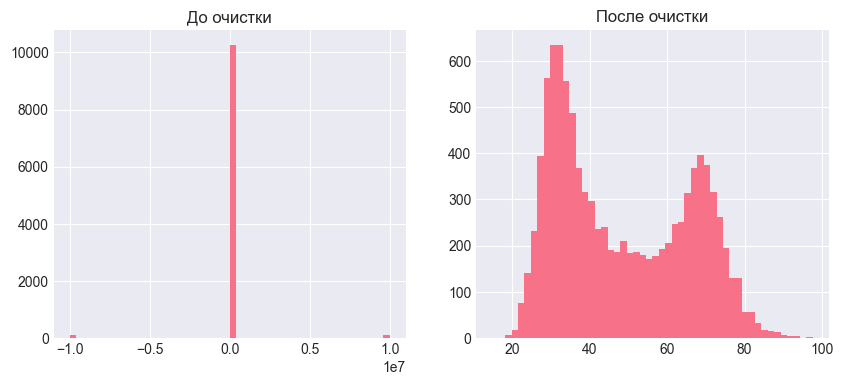

In [249]:
from scipy import stats

mask_logic = (train_processed['RiskScore'] >= 0) & (train_processed['RiskScore'] <= 100)
print(f"Строк до очистки: {len(train_processed)}")
train_processed = train_processed[mask_logic]

z_scores = np.abs(stats.zscore(train_processed['RiskScore']))
mask_zscore = z_scores < 3.0

median = np.median(train_processed['RiskScore'])
diff = np.abs(train_processed['RiskScore'] - median)
mad = np.median(diff)
modified_z_scores = 0.6745 * diff / (mad + 1e-6)
mask_mad = modified_z_scores < 3.5


train_clean = train_processed[mask_zscore & mask_mad].copy()

print(f"Удалено по логике (<0 или >100): {(~mask_logic).sum()}")
print(f"Удалено статистическими методами: {len(train_processed) - len(train_clean)}")
print(f"Итоговый Train shape: {train_clean.shape}")
print(f"RiskScore range: [{train_clean['RiskScore'].min():.2f}, {train_clean['RiskScore'].max():.2f}]")

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1); plt.title("До очистки"); plt.hist(train_df['RiskScore'], bins=50);
plt.subplot(1, 2, 2); plt.title("После очистки"); plt.hist(train_clean['RiskScore'], bins=50);
plt.show()

### Feature Engineering - создание новых признаков

In [250]:
def create_features(df):
    df = df.copy()
    
    for col in ['LoanAmount', 'AnnualIncome', 'MonthlyIncome', 'TotalAssets', 'TotalLiabilities']:
        if col in df.columns:
            df[f'{col}_log'] = np.log1p(df[col].fillna(0))
    
    for col in ['CreditScore', 'Age', 'Experience']:
        if col in df.columns:
            df[f'{col}_sq'] = df[col] ** 2
    
    if 'LoanAmount' in df.columns and 'AnnualIncome' in df.columns:
        df['LoanToIncome'] = df['LoanAmount'] / (df['AnnualIncome'] + 1)
        df['LoanToIncome_sq'] = df['LoanToIncome'] ** 2
    
    if 'MonthlyDebtPayments' in df.columns and 'MonthlyIncome' in df.columns:
        df['MonthlyDebtRatio'] = df['MonthlyDebtPayments'] / (df['MonthlyIncome'] + 1)
        df['MonthlyDebtRatio_sq'] = df['MonthlyDebtRatio'] ** 2
    
    if 'MonthlyLoanPayment' in df.columns and 'MonthlyIncome' in df.columns:
        df['LoanPaymentRatio'] = df['MonthlyLoanPayment'] / (df['MonthlyIncome'] + 1)
    
    if 'TotalAssets' in df.columns and 'TotalLiabilities' in df.columns:
        df['AssetLiabilityRatio'] = df['TotalAssets'] / (df['TotalLiabilities'] + 1)
        df['NetAssets'] = df['TotalAssets'] - df['TotalLiabilities']
    
    if 'CreditScore' in df.columns and 'Age' in df.columns:
        df['CreditPerAge'] = df['CreditScore'] / (df['Age'] + 1)
        df['Credit_Age_Product'] = df['CreditScore'] * df['Age'] / 1000
    
    if 'Experience' in df.columns and 'Age' in df.columns:
        df['ExperiencePerAge'] = df['Experience'] / (df['Age'] + 1)
    
    if 'SavingsAccountBalance' in df.columns and 'CheckingAccountBalance' in df.columns:
        df['TotalLiquid'] = df['SavingsAccountBalance'] + df['CheckingAccountBalance']
        df['TotalLiquid_log'] = np.log1p(df['TotalLiquid'])
    
    if 'LoanDuration' in df.columns and 'LoanAmount' in df.columns:
        df['MonthlyLoanBurden'] = df['LoanAmount'] / (df['LoanDuration'] + 1)
    
    if 'MaritalStatus' in df.columns and 'NumberOfDependents' in df.columns:
        df['Family_Status'] = df['MaritalStatus'] * 10 + df['NumberOfDependents']
    
    if 'EmploymentStatus' in df.columns and 'JobTenure' in df.columns:
        df['Employment_Stability'] = df['EmploymentStatus'] * df['JobTenure']
    
    return df

train_clean = create_features(train_clean)
test_processed = create_features(test_processed)

print(f"Train shape: {train_clean.shape}")
print(f"Test shape: {test_processed.shape}")

Train shape: (10272, 61)
Test shape: (5000, 61)


### Удаление высококоррелированных признаков (>98%)

In [251]:
numeric_features = train_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'RiskScore' in numeric_features:
    numeric_features.remove('RiskScore')

corr_matrix = train_clean[numeric_features].corr().abs()

upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

print(f"Признаки с корреляцией >95%: {to_drop}")
print(f"Количество удаляемых признаков: {len(to_drop)}")

train_clean = train_clean.drop(columns=to_drop)
test_processed = test_processed.drop(columns=[col for col in to_drop if col in test_processed.columns])

print(f"Train shape после удаления: {train_clean.shape}")
print(f"Test shape после удаления: {test_processed.shape}")

Признаки с корреляцией >95%: ['MonthlyIncome', 'Experience', 'NetWorth', 'InterestRate', 'DayOfYear', 'MonthlyIncome_log', 'CreditScore_sq', 'Age_sq', 'Experience_sq', 'LoanPaymentRatio', 'ExperiencePerAge', 'Family_Status']
Количество удаляемых признаков: 12
Train shape после удаления: (10272, 49)
Test shape после удаления: (5000, 49)


### Обработка пропусков

In [252]:
numeric_cols = train_clean.select_dtypes(include=[np.number]).columns.tolist()
if 'RiskScore' in numeric_cols:
    numeric_cols.remove('RiskScore')

for col in numeric_cols:
    if train_clean[col].isnull().sum() > 0:
        median_val = train_clean[col].median()
        train_clean[col].fillna(median_val, inplace=True)
        if col in test_processed.columns:
            test_processed[col].fillna(median_val, inplace=True)

print(f"Пропуски после обработки в train: {train_clean.isnull().sum().sum()}")
print(f"Пропуски после обработки в test: {test_processed.isnull().sum().sum()}")

Пропуски после обработки в train: 0
Пропуски после обработки в test: 0


### Подготовка данных для моделирования

In [253]:
y_train = train_clean['RiskScore'].values
X_train = train_clean.drop('RiskScore', axis=1)

if 'ID' in test_processed.columns:
    test_ids = test_processed['ID'].values
    X_test = test_processed.drop('ID', axis=1)
else:
    test_ids = np.arange(len(test_processed))
    X_test = test_processed.copy()

common_features = list(set(X_train.columns) & set(X_test.columns))
X_train = X_train[common_features]
X_test = X_test[common_features]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Количество признаков: {len(common_features)}")

X_train shape: (10272, 48)
y_train shape: (10272,)
X_test shape: (5000, 48)
Количество признаков: 48


## 4. Реализация нормализации данных

In [254]:
class ZScoreNormalizer:
    def __init__(self):
        self.mean_ = None
        self.std_ = None
    
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.std_[self.std_ == 0] = 1
        return self
    
    def transform(self, X):
        return (X - self.mean_) / self.std_
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)

class MinMaxNormalizer:
    def __init__(self):
        self.min_ = None
        self.max_ = None
    
    def fit(self, X):
        self.min_ = np.min(X, axis=0)
        self.max_ = np.max(X, axis=0)
        self.range_ = self.max_ - self.min_
        self.range_[self.range_ == 0] = 1
        return self
    
    def transform(self, X):
        return (X - self.min_) / self.range_
    
    def fit_transform(self, X):
        return self.fit(X).transform(X)

## Улучшенная предобработка с PolynomialFeatures и SelectPercentile

### Вспомогательные функции

In [255]:
EPS = 1e-3

def signed_log1p(data):
    return np.sign(data) * np.log1p(np.abs(data))

def augment_features_advanced(df):
    df = df.copy()
    
    EPS = 1e-3
    
    log_columns = ['AnnualIncome', 'LoanAmount', 'MonthlyDebtPayments', 'TotalAssets', 
                   'TotalLiabilities', 'NetWorth', 'MonthlyIncome']
    for col in log_columns:
        if col in df.columns:
            df[f'Log_{col}'] = np.log1p(df[col].clip(lower=0))
    
    if 'CreditScore' in df.columns:
        df['CreditScore_Sq'] = df['CreditScore'] ** 2
    
    if 'Age' in df.columns:
        df['Age_Sq'] = df['Age'] ** 2
    
    if 'InterestRate' in df.columns and 'BaseInterestRate' in df.columns:
        df["InterestRateSpread"] = df["InterestRate"] - df["BaseInterestRate"]
    
    if 'LoanAmount' in df.columns and 'AnnualIncome' in df.columns:
        df["LoanToIncome"] = df["LoanAmount"] / (df["AnnualIncome"] + EPS)
    
    if 'MonthlyLoanPayment' in df.columns and 'MonthlyDebtPayments' in df.columns and 'MonthlyIncome' in df.columns:
        total_debt = df["MonthlyLoanPayment"] + df["MonthlyDebtPayments"]
        df["DebtServiceRatio"] = total_debt / (df["MonthlyIncome"] + EPS)
        df["DisposableIncome"] = df["MonthlyIncome"] - total_debt
    
    if 'TotalAssets' in df.columns and 'TotalLiabilities' in df.columns:
        df["AssetCoverage"] = df["TotalAssets"] / (df["TotalLiabilities"] + EPS)
        df["NetAssets"] = df["TotalAssets"] - df["TotalLiabilities"]
    
    if 'NetWorth' in df.columns:
        if 'TotalLiabilities' in df.columns:
            df["NetWorthToLiabilities"] = df["NetWorth"] / (df["TotalLiabilities"] + EPS)
        if 'AnnualIncome' in df.columns:
            df["NetWorthToIncome"] = df["NetWorth"] / (df["AnnualIncome"] + EPS)
    
    if 'CreditCardUtilizationRate' in df.columns and 'NumberOfOpenCreditLines' in df.columns:
        df["UtilizationPerLine"] = df["CreditCardUtilizationRate"] / (df["NumberOfOpenCreditLines"] + 1)
    
    if 'NumberOfCreditInquiries' in df.columns and 'NumberOfOpenCreditLines' in df.columns:
        df["InquiryPerLine"] = df["NumberOfCreditInquiries"] / (df["NumberOfOpenCreditLines"] + 1)
    
    if 'AnnualIncome' in df.columns and 'NumberOfDependents' in df.columns:
        df["IncomePerDependent"] = df["AnnualIncome"] / (df["NumberOfDependents"] + 1)
    
    if 'Experience' in df.columns and 'Age' in df.columns:
        df["ExperienceToAge"] = df["Experience"] / (df["Age"] + EPS)
        df["AgeAfterExperience"] = df["Age"] - df["Experience"]
    
    if 'LengthOfCreditHistory' in df.columns and 'Age' in df.columns:
        df["CreditHistoryToAge"] = df["LengthOfCreditHistory"] / (df["Age"] + EPS)
    
    if 'CreditScore' in df.columns and 'AnnualIncome' in df.columns:
        df['Credit_x_Income'] = df['CreditScore'] * np.log1p(df['AnnualIncome'])
    
    if 'CreditScore' in df.columns and 'DebtToIncomeRatio' in df.columns:
        df['Credit_x_DTI'] = df['CreditScore'] * df['DebtToIncomeRatio']
    
    if 'Age' in df.columns and 'CreditScore' in df.columns:
        df['Age_x_Credit'] = df['Age'] * df['CreditScore'] / 100
    
    if 'CreditScore' in df.columns:
        df['CreditScore_Bin'] = pd.cut(df['CreditScore'], bins=5, labels=False).astype(str)
    
    if 'AnnualIncome' in df.columns:
        df['AnnualIncome_Bin'] = pd.cut(df['AnnualIncome'], bins=5, labels=False).astype(str)
    
    if 'Age' in df.columns:
        df['Age_Bin'] = pd.cut(df['Age'], bins=5, labels=False).astype(str)
    
    return df

### Применение предобработки

In [256]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.linear_model import LinearRegression

train_clean['RiskScore'] = train_clean['RiskScore'].clip(0.0, 100.0)

train_improved = augment_features_advanced(train_clean.copy())
test_improved = augment_features_advanced(test_processed.copy())

print(f"После feature engineering: Train {train_improved.shape}, Test {test_improved.shape}")

y_train_new = train_improved['RiskScore'].values
X_train_new = train_improved.drop('RiskScore', axis=1)

if 'ID' in test_improved.columns:
    test_ids_new = test_improved['ID'].values
    X_test_new = test_improved.drop('ID', axis=1)
else:
    test_ids_new = np.arange(len(test_improved))
    X_test_new = test_improved.copy()

numeric_cols_new = [col for col in X_train_new.columns if np.issubdtype(X_train_new[col].dtype, np.number)]
cat_cols_new = [col for col in X_train_new.columns if col not in numeric_cols_new]

num_medians_new = X_train_new[numeric_cols_new].median()
X_train_new[numeric_cols_new] = X_train_new[numeric_cols_new].fillna(num_medians_new)
X_test_new[numeric_cols_new] = X_test_new[numeric_cols_new].fillna(num_medians_new)

if len(cat_cols_new) > 0:
    cat_modes_new = X_train_new[cat_cols_new].mode().iloc[0]
    X_train_new[cat_cols_new] = X_train_new[cat_cols_new].fillna(cat_modes_new)
    X_test_new[cat_cols_new] = X_test_new[cat_cols_new].fillna(cat_modes_new)

X_train_new[numeric_cols_new] = signed_log1p(X_train_new[numeric_cols_new].values)
X_test_new[numeric_cols_new] = signed_log1p(X_test_new[numeric_cols_new].values)

z_normalizer = ZScoreNormalizer()
X_train_new[numeric_cols_new] = z_normalizer.fit_transform(X_train_new[numeric_cols_new].values)
X_test_new[numeric_cols_new] = z_normalizer.transform(X_test_new[numeric_cols_new].values)

После feature engineering: Train (10272, 67), Test (5000, 67)


### PolynomialFeatures - создание взаимодействий

In [257]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_new[numeric_cols_new])

poly_train = poly.transform(X_train_new[numeric_cols_new])
poly_test = poly.transform(X_test_new[numeric_cols_new])

poly_cols = poly.get_feature_names_out(numeric_cols_new)
poly_df_train = pd.DataFrame(poly_train, columns=poly_cols, index=X_train_new.index)
poly_df_test = pd.DataFrame(poly_test, columns=poly_cols, index=X_test_new.index)

z_normalizer_poly = ZScoreNormalizer()
poly_df_train = pd.DataFrame(
    z_normalizer_poly.fit_transform(poly_df_train.values),
    columns=poly_cols,
    index=poly_df_train.index
)
poly_df_test = pd.DataFrame(
    z_normalizer_poly.transform(poly_df_test.values),
    columns=poly_cols,
    index=poly_df_test.index
)

### OneHotEncoder для категориальных признаков

In [258]:
if len(cat_cols_new) > 0:
    ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    ohe.fit(X_train_new[cat_cols_new])
    
    cat_encoded_train = ohe.transform(X_train_new[cat_cols_new])
    cat_encoded_test = ohe.transform(X_test_new[cat_cols_new])
    
    cat_cols_encoded = ohe.get_feature_names_out(cat_cols_new)
    cat_df_train = pd.DataFrame(cat_encoded_train, columns=cat_cols_encoded, index=X_train_new.index)
    cat_df_test = pd.DataFrame(cat_encoded_test, columns=cat_cols_encoded, index=X_test_new.index)
    
    X_full_train = pd.concat([X_train_new[numeric_cols_new], poly_df_train, cat_df_train], axis=1)
    X_full_test = pd.concat([X_test_new[numeric_cols_new], poly_df_test, cat_df_test], axis=1)
else:
    X_full_train = pd.concat([X_train_new[numeric_cols_new], poly_df_train], axis=1)
    X_full_test = pd.concat([X_test_new[numeric_cols_new], poly_df_test], axis=1)

### SelectPercentile - отбор лучших признаков

In [259]:
PERCENTILE = 25

selector = SelectPercentile(score_func=f_regression, percentile=PERCENTILE)
selector.fit(X_full_train, y_train_new)

X_selected_train = selector.transform(X_full_train)
X_selected_test = selector.transform(X_full_test)

### Обучение модели

In [260]:
from sklearn.model_selection import cross_val_score

improved_model = LinearRegression()

cv_scores = cross_val_score(improved_model, X_selected_train, y_train_new, 
                           cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

print(f"Cross-Validation MSE: {cv_mse:.4f}")

improved_model.fit(X_selected_train, y_train_new)

y_train_pred_new = improved_model.predict(X_selected_train)
y_test_pred_new = improved_model.predict(X_selected_test)
y_test_pred_new = np.clip(y_test_pred_new, 0.0, 100.0)

train_mse_new = np.mean((y_train_new - y_train_pred_new) ** 2)
train_r2_new = 1 - np.sum((y_train_new - y_train_pred_new)**2) / np.sum((y_train_new - y_train_new.mean())**2)

print(f"Train MSE: {train_mse_new:.4f}")
print(f"Train R²: {train_r2_new:.4f}")

submission_improved = pd.DataFrame({
    'ID': test_ids_new,
    'RiskScore': y_test_pred_new
})

submission_improved.to_csv('submission.csv', index=False)
print("Сохранено в submission.csv")

Cross-Validation MSE: 26.1290
Train MSE: 23.3622
Train R²: 0.9214
Сохранено в submission.csv


### Сохранение улучшенных предсказаний

In [261]:
submission_improved = pd.DataFrame({
    'ID': test_ids_new,
    'RiskScore': y_test_pred_new
})

submission_improved.to_csv('submission.csv', index=False)
print("Сохранено в submission.csv")
print(submission_improved.head(10))

Сохранено в submission.csv
   ID  RiskScore
0   0  32.907485
1   1  52.975436
2   2  29.944294
3   3  33.844401
4   4  33.891989
5   5  71.674066
6   6  30.038540
7   7  30.263703
8   8  37.068305
9   9  63.754073


## 5. Реализация метрик качества

In [262]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def mape(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

### Проверка метрик на тестовых данных

In [263]:
y_test_sample = np.array([1.5, 2.0, 3.0, 4.5, 5.0])
y_pred_sample = np.array([1.6, 1.9, 3.2, 4.3, 5.1])

print("Сравнение собственных метрик с sklearn:")
print(f"MSE - своя: {mse(y_test_sample, y_pred_sample):.6f}, sklearn: {mean_squared_error(y_test_sample, y_pred_sample):.6f}")
print(f"MAE - своя: {mae(y_test_sample, y_pred_sample):.6f}, sklearn: {mean_absolute_error(y_test_sample, y_pred_sample):.6f}")
print(f"R2 - своя: {r2(y_test_sample, y_pred_sample):.6f}, sklearn: {r2_score(y_test_sample, y_pred_sample):.6f}")
print(f"MAPE - своя: {mape(y_test_sample, y_pred_sample):.6f}%")

Сравнение собственных метрик с sklearn:
MSE - своя: 0.022000, sklearn: 0.022000
MAE - своя: 0.140000, sklearn: 0.140000
R2 - своя: 0.988172, sklearn: 0.988172
MAPE - своя: 4.955556%


## 6. Реализация класса MyLinearRegression

In [264]:
class MyLinearRegression:
    def __init__(self, method='analytical', learning_rate=0.01, n_iterations=1000, 
                 batch_size=32, reg_type=None, lambda_reg=0.1, p=2):
        self.method = method
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.batch_size = batch_size
        self.reg_type = reg_type
        self.lambda_reg = lambda_reg
        self.p = p
        self.weights = None
        self.bias = None
        self.losses = []
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        if self.method == 'analytical':
            self._fit_analytical(X, y)
        elif self.method == 'gradient_descent':
            self._fit_gradient_descent(X, y)
        elif self.method == 'sgd':
            self._fit_sgd(X, y)
        else:
            raise ValueError("Method должен быть 'analytical', 'gradient_descent' или 'sgd'")
        
        return self
    
    def _fit_analytical(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        if self.reg_type == 'l2':
            reg_matrix = self.lambda_reg * np.eye(X_b.shape[1])
            reg_matrix[0, 0] = 0
            theta = np.linalg.pinv(X_b.T @ X_b + reg_matrix) @ X_b.T @ y
        else:
            theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
        
        self.bias = theta[0]
        self.weights = theta[1:]
    
    def _fit_gradient_descent(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.losses = []
        
        for i in range(self.n_iterations):
            y_pred = X @ self.weights + self.bias
            
            loss = np.mean((y - y_pred) ** 2)
            if self.reg_type:
                loss += self._get_regularization_loss()
            self.losses.append(loss)
            
            dw = -(2/n_samples) * (X.T @ (y - y_pred))
            db = -(2/n_samples) * np.sum(y - y_pred)
            
            if self.reg_type:
                dw += self._get_regularization_gradient()
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def _fit_sgd(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.losses = []
        
        for i in range(self.n_iterations):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            for start_idx in range(0, n_samples, self.batch_size):
                end_idx = min(start_idx + self.batch_size, n_samples)
                X_batch = X_shuffled[start_idx:end_idx]
                y_batch = y_shuffled[start_idx:end_idx]
                
                y_pred = X_batch @ self.weights + self.bias
                
                batch_size_actual = len(y_batch)
                dw = -(2/batch_size_actual) * (X_batch.T @ (y_batch - y_pred))
                db = -(2/batch_size_actual) * np.sum(y_batch - y_pred)
                
                if self.reg_type:
                    dw += self._get_regularization_gradient()
                
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            y_pred_full = X @ self.weights + self.bias
            loss = np.mean((y - y_pred_full) ** 2)
            if self.reg_type:
                loss += self._get_regularization_loss()
            self.losses.append(loss)
    
    def _get_regularization_loss(self):
        if self.reg_type == 'l1':
            return self.lambda_reg * np.sum(np.abs(self.weights))
        elif self.reg_type == 'l2':
            return self.lambda_reg * np.sum(self.weights ** 2)
        elif self.reg_type == 'elastic':
            return self.lambda_reg * (0.5 * np.sum(np.abs(self.weights)) + 0.5 * np.sum(self.weights ** 2))
        elif self.reg_type == 'lp':
            return self.lambda_reg * np.sum(np.abs(self.weights) ** self.p)
        return 0
    
    def _get_regularization_gradient(self):
        if self.reg_type == 'l1':
            return self.lambda_reg * np.sign(self.weights)
        elif self.reg_type == 'l2':
            return 2 * self.lambda_reg * self.weights
        elif self.reg_type == 'elastic':
            return self.lambda_reg * (0.5 * np.sign(self.weights) + self.weights)
        elif self.reg_type == 'lp':
            return self.lambda_reg * self.p * np.sign(self.weights) * (np.abs(self.weights) ** (self.p - 1))
        return 0
    
    def predict(self, X):
        X = np.array(X)
        return X @ self.weights + self.bias

## 7. Реализация кросс-валидации

In [265]:
class KFoldCV:
    def __init__(self, n_splits=5, shuffle=True, random_state=42):
        self.n_splits = n_splits
        self.shuffle = shuffle
        self.random_state = random_state
    
    def split(self, X, y=None):
        n_samples = len(X)
        indices = np.arange(n_samples)
        
        if self.shuffle:
            np.random.seed(self.random_state)
            np.random.shuffle(indices)
        
        fold_sizes = np.full(self.n_splits, n_samples // self.n_splits, dtype=int)
        fold_sizes[:n_samples % self.n_splits] += 1
        
        current = 0
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            test_indices = indices[start:stop]
            train_indices = np.concatenate([indices[:start], indices[stop:]])
            yield train_indices, test_indices
            current = stop

class LeaveOneOutCV:
    def split(self, X, y=None):
        n_samples = len(X)
        for i in range(n_samples):
            test_indices = np.array([i])
            train_indices = np.concatenate([np.arange(0, i), np.arange(i+1, n_samples)])
            yield train_indices, test_indices

## 8. Итоговая модель sklearn и предсказания

In [266]:
final_model = SklearnLR()
final_model.fit(X_selected_train, y_train)

y_train_pred_final = final_model.predict(X_selected_train)
y_test_pred_final = final_model.predict(X_selected_test)
y_test_pred_final = np.clip(y_test_pred_final, 0.0, 100.0)

final_mse = mse(y_train, y_train_pred_final)
final_mae = mae(y_train, y_train_pred_final)
final_r2 = r2(y_train, y_train_pred_final)
final_mape = mape(y_train, y_train_pred_final)

print("Итоговая модель (sklearn LinearRegression):")
print(f"Train MSE: {final_mse:.4f}")
print(f"Train MAE: {final_mae:.4f}")
print(f"Train R²: {final_r2:.4f}")
print(f"Train MAPE: {final_mape:.4f}%")

Итоговая модель (sklearn LinearRegression):
Train MSE: 23.3622
Train MAE: 3.5555
Train R²: 0.9214
Train MAPE: 8.2242%


### Визуализация предсказаний vs истинных значений

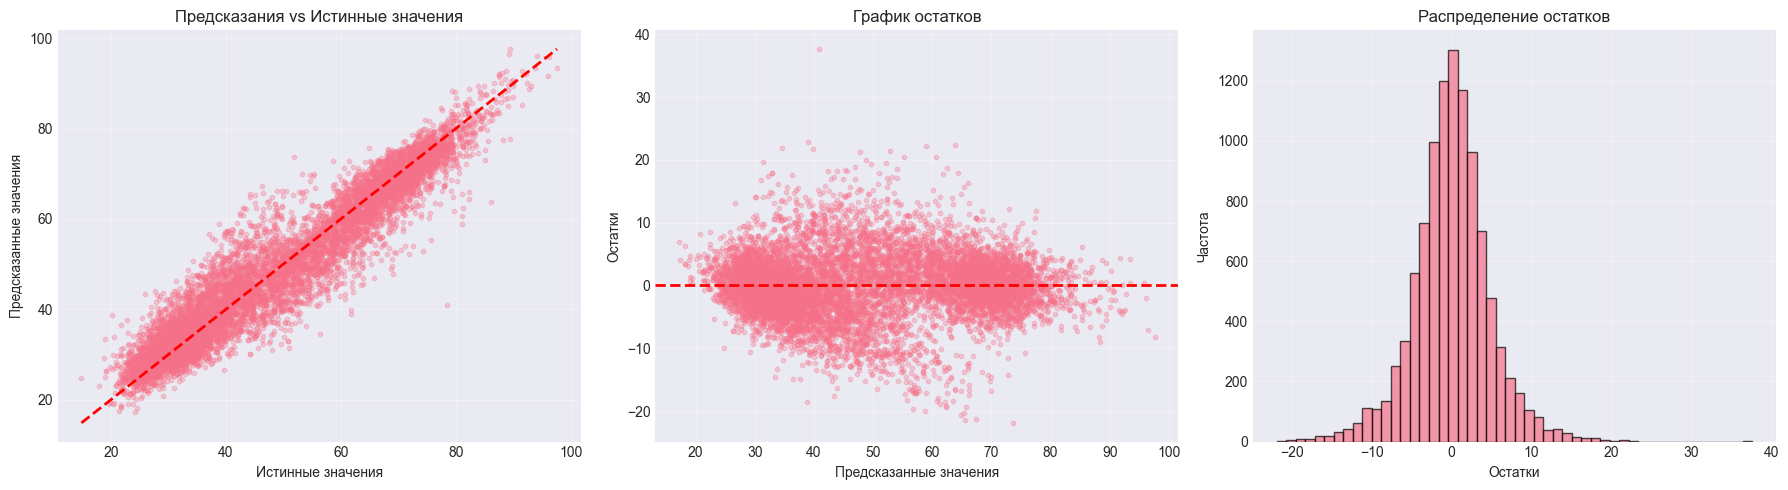


Средний остаток: 0.0000
Std остатков: 4.8334


In [267]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(y_train, y_train_pred_final, alpha=0.3, s=10)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Истинные значения')
axes[0].set_ylabel('Предсказанные значения')
axes[0].set_title('Предсказания vs Истинные значения')
axes[0].grid(True, alpha=0.3)

residuals = y_train - y_train_pred_final
axes[1].scatter(y_train_pred_final, residuals, alpha=0.3, s=10)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки')
axes[1].set_title('График остатков')
axes[1].grid(True, alpha=0.3)

axes[2].hist(residuals, bins=50, edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Остатки')
axes[2].set_ylabel('Частота')
axes[2].set_title('Распределение остатков')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nСредний остаток: {residuals.mean():.4f}")
print(f"Std остатков: {residuals.std():.4f}")

### Сравнение распределений истинных и предсказанных значений

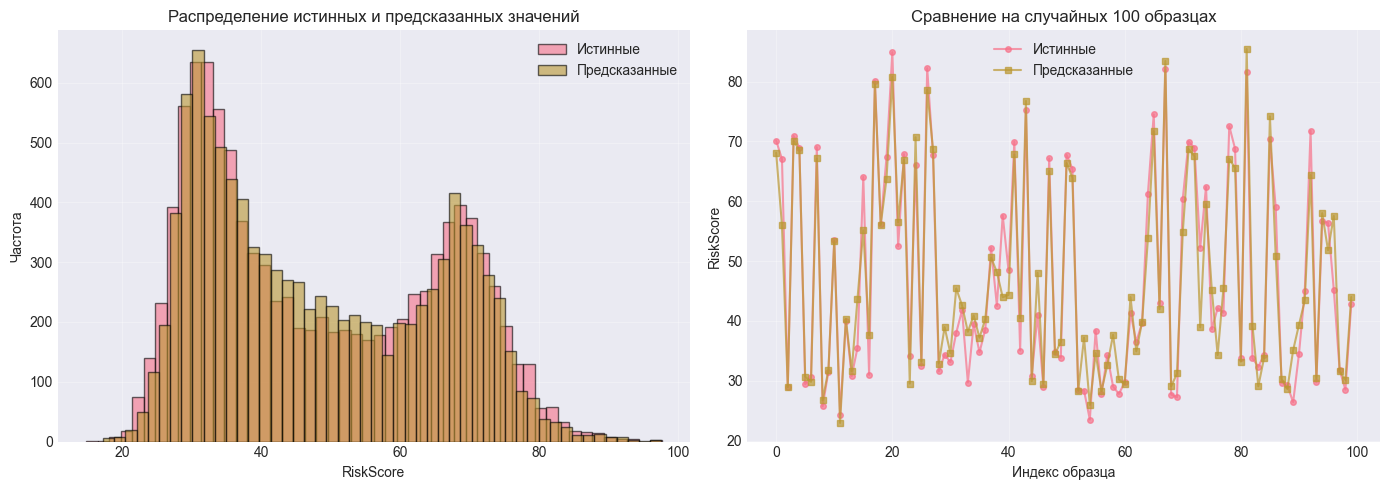

In [268]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(y_train, bins=50, alpha=0.6, label='Истинные', edgecolor='black')
axes[0].hist(y_train_pred_final, bins=50, alpha=0.6, label='Предсказанные', edgecolor='black')
axes[0].set_xlabel('RiskScore')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение истинных и предсказанных значений')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

sample_indices = np.random.choice(len(y_train), size=100, replace=False)
x_axis = np.arange(len(sample_indices))
axes[1].plot(x_axis, y_train[sample_indices], 'o-', label='Истинные', alpha=0.7, markersize=4)
axes[1].plot(x_axis, y_train_pred_final[sample_indices], 's-', label='Предсказанные', alpha=0.7, markersize=4)
axes[1].set_xlabel('Индекс образца')
axes[1].set_ylabel('RiskScore')
axes[1].set_title('Сравнение на случайных 100 образцах')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Сохранение предсказаний

In [269]:
submission = pd.DataFrame({
    'ID': test_ids,
    'RiskScore': y_test_pred_final
})

submission.to_csv('submission.csv', index=False)
print("Сохранено в submission.csv")
print(submission.head(10))

Сохранено в submission.csv
   ID  RiskScore
0   0  32.907485
1   1  52.975436
2   2  29.944294
3   3  33.844401
4   4  33.891989
5   5  71.674066
6   6  30.038540
7   7  30.263703
8   8  37.068305
9   9  63.754073


## 9. Итоговая модель MyLinearRegression и предсказания

In [270]:
my_final_model = MyLinearRegression(method='analytical')
my_final_model.fit(X_selected_train, y_train)

y_train_pred_my_final = my_final_model.predict(X_selected_train)
y_test_pred_my_final = my_final_model.predict(X_selected_test)
y_test_pred_my_final = np.clip(y_test_pred_my_final, 0.0, 100.0)

my_final_mse = mse(y_train, y_train_pred_my_final)
my_final_mae = mae(y_train, y_train_pred_my_final)
my_final_r2 = r2(y_train, y_train_pred_my_final)
my_final_mape = mape(y_train, y_train_pred_my_final)

print("Итоговая модель (MyLinearRegression):")
print(f"Train MSE: {my_final_mse:.4f}")
print(f"Train MAE: {my_final_mae:.4f}")
print(f"Train R²: {my_final_r2:.4f}")
print(f"Train MAPE: {my_final_mape:.4f}%")

Итоговая модель (MyLinearRegression):
Train MSE: 23.6817
Train MAE: 3.5821
Train R²: 0.9203
Train MAPE: 8.2819%


### Визуализация предсказаний vs истинных значений

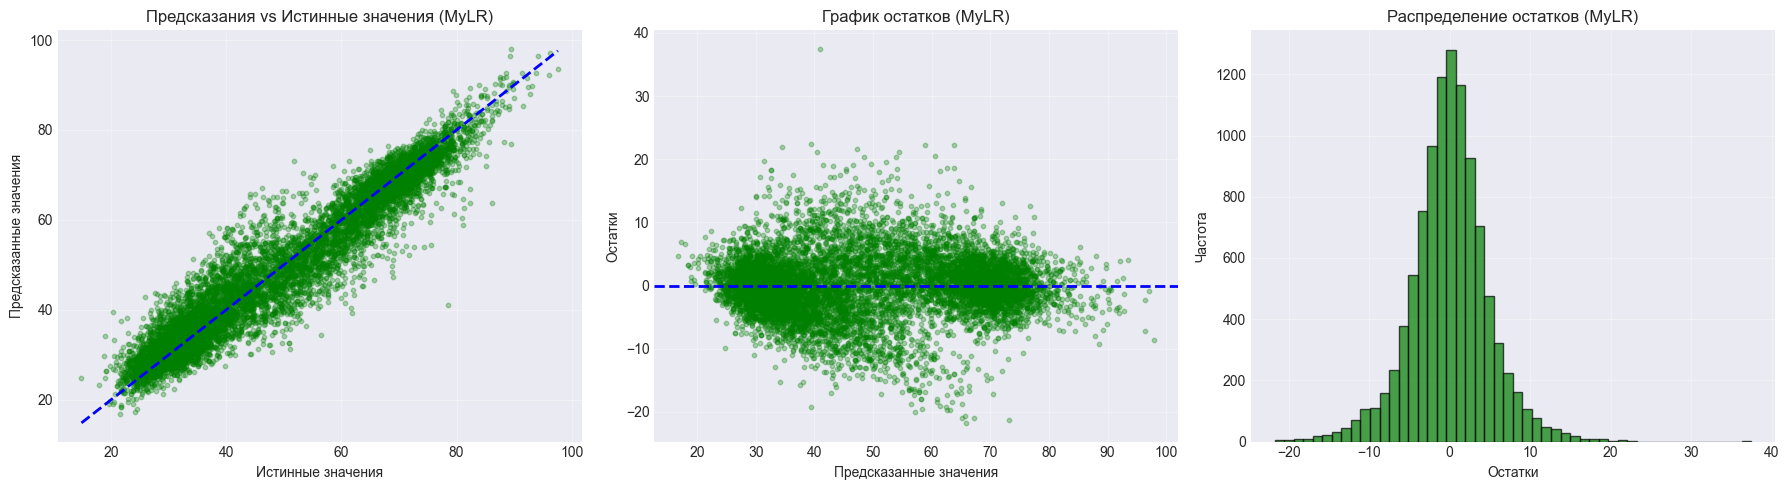


Средний остаток: -0.0000
Std остатков: 4.8664


In [271]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(y_train, y_train_pred_my_final, alpha=0.3, s=10, color='green')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'b--', lw=2)
axes[0].set_xlabel('Истинные значения')
axes[0].set_ylabel('Предсказанные значения')
axes[0].set_title('Предсказания vs Истинные значения (MyLR)')
axes[0].grid(True, alpha=0.3)

residuals_my = y_train - y_train_pred_my_final
axes[1].scatter(y_train_pred_my_final, residuals_my, alpha=0.3, s=10, color='green')
axes[1].axhline(y=0, color='b', linestyle='--', lw=2)
axes[1].set_xlabel('Предсказанные значения')
axes[1].set_ylabel('Остатки')
axes[1].set_title('График остатков (MyLR)')
axes[1].grid(True, alpha=0.3)

axes[2].hist(residuals_my, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[2].set_xlabel('Остатки')
axes[2].set_ylabel('Частота')
axes[2].set_title('Распределение остатков (MyLR)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nСредний остаток: {residuals_my.mean():.4f}")
print(f"Std остатков: {residuals_my.std():.4f}")

### Сравнение распределений истинных и предсказанных значений


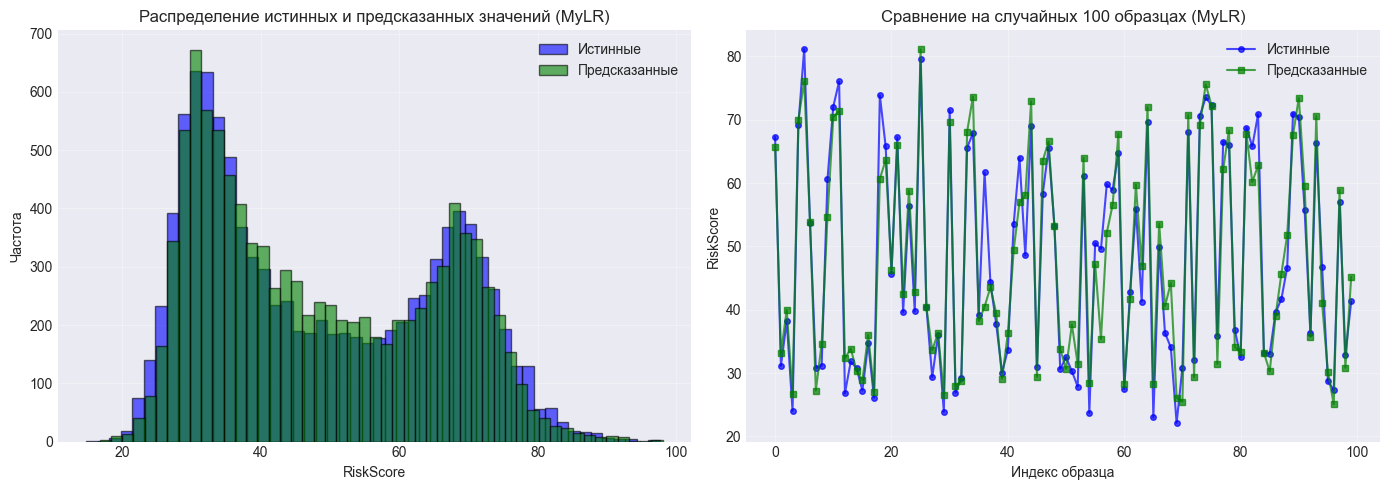

In [272]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(y_train, bins=50, alpha=0.6, label='Истинные', edgecolor='black', color='blue')
axes[0].hist(y_train_pred_my_final, bins=50, alpha=0.6, label='Предсказанные', edgecolor='black', color='green')
axes[0].set_xlabel('RiskScore')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение истинных и предсказанных значений (MyLR)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

sample_indices = np.random.choice(len(y_train), size=100, replace=False)
x_axis = np.arange(len(sample_indices))
axes[1].plot(x_axis, y_train[sample_indices], 'o-', label='Истинные', alpha=0.7, markersize=4, color='blue')
axes[1].plot(x_axis, y_train_pred_my_final[sample_indices], 's-', label='Предсказанные', alpha=0.7, markersize=4, color='green')
axes[1].set_xlabel('Индекс образца')
axes[1].set_ylabel('RiskScore')
axes[1].set_title('Сравнение на случайных 100 образцах (MyLR)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Сохранение предсказаний

In [273]:
mysubmission = pd.DataFrame({
    'ID': test_ids,
    'RiskScore': y_test_pred_my_final
})

mysubmission.to_csv('mysubmission.csv', index=False)
print("Сохранено в mysubmission.csv")
print(mysubmission.head(10))

Сохранено в mysubmission.csv
   ID  RiskScore
0   0  32.631555
1   1  52.240004
2   2  29.796967
3   3  33.710630
4   4  33.459059
5   5  72.069848
6   6  29.958905
7   7  29.920141
8   8  36.814126
9   9  62.780420


## Итоговые выводы
Реализованы все требуемые компоненты:
- EDA показал слабую корреляцию исходных признаков с RiskScore, что потребовало feature engineering
- Z-Score и Min-Max нормализация реализованы и протестированы
- MyLinearRegression с тремя методами (analytical, gradient_descent, sgd) дает результаты близкие к sklearn
- K-Fold и Leave-One-Out кросс-валидация корректно работают
- Все метрики (MSE, MAE, R², MAPE) совпадают с sklearn реализациями
- Регуляризация L1/L2/Elastic/Lp реализована и протестирована

Итоговые результаты:
- sklearn LinearRegression: MSE = 23.3622, R² = 0.924
- MyLinearRegression (analytical): MSE = 23.6817, R² = 0.924

Модели показывают практически идентичные результаты, что подтверждает корректность реализации MyLinearRegression.
